In [1]:
# """
# THIS CODE WAS USED FOR DATA GENERATION AND DOES NOT NEED TO BE EXECUTED IN THE NOTEBOOK
# IF YOU WANT TO EXECUTE IT, CONVERT IT TO A PYTHON CELL AND RUN IT
# """

# import arxiv
# import random
# import time
# from datetime import date, timedelta
# import pandas as pd
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor, as_completed

# def get_relevant_data(result):
#     """Fetch a single paper and return its data."""
#     return {
#         "title": result.title,
#         "abstract": result.summary.replace("\n", " "),
#         "category": result.primary_category,
#         "published": result.published.strftime("%d-%m-%Y"),
#     }

# def fetch_papers_for_month_and_category(client, category, first_day, last_day, papers_per_month_per_category):
#     try:
#         search = arxiv.Search(
#             query=f"cat:{category} AND submittedDate:[{first_day.strftime('%Y%m%d%H%M%S')} TO {last_day.strftime('%Y%m%d%H%M%S')}]",
#             max_results=150,
#             sort_by=arxiv.SortCriterion.Relevance
#         )
        
#         # Fetch results in batches
#         papers = []
#         for result in client.results(search):
#             if result.primary_category in category:
#                 papers.append(get_relevant_data(result))
        
#         if len(papers) > papers_per_month_per_category:
#             papers = random.sample(papers, papers_per_month_per_category)
        
#         return papers
#     except Exception as e:
#         print(f"Error fetching papers for category {category}: {e}")
#         return []

# def fetch_arxiv_papers(categories, start_date, end_date, papers_per_month, batch_size=200):
#     client = arxiv.Client(page_size=batch_size)
#     total_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1
#     csv_filename = 'arxiv_papers2.csv'
#     papers_per_month_per_category = papers_per_month // len(categories)
    
#     # Precompute all month ranges
#     month_ranges = []
#     current_date = start_date
#     for _ in range(total_months):
#         year = current_date.year
#         month_num = current_date.month
#         first_day = date(year, month_num, 1)
#         if month_num == 12:
#             next_month_first_day = date(year + 1, 1, 1)
#         else:
#             next_month_first_day = date(year, month_num + 1, 1)
#         last_day = next_month_first_day - timedelta(days=1)
#         month_ranges.append((first_day, last_day))

#         if current_date.month == 12:
#             current_date = date(current_date.year + 1, 1, 1)
#         else:
#             current_date = date(current_date.year, current_date.month + 1, 1)

#     # Prepare all tasks
#     tasks = []
#     for _, (first_day, last_day) in enumerate(month_ranges):
#         for category in categories:
#             tasks.append((client, category, first_day, last_day, papers_per_month_per_category))
            
#     # Check if the CSV file exists
#     file_exists = False
#     try:
#         test = pd.read_csv(csv_filename, nrows=1)
#         file_exists = True
#     except FileNotFoundError:
#         file_exists = False

#     # Create the CSV file if it doesn't exist
#     if not file_exists:
#         with open(csv_filename, 'w') as f:
#             f.write("title,abstract,category,published\n")
#             file_exists = True

#     # Process tasks and write to CSV in chunks
#     with ThreadPoolExecutor() as executor:
#         header = not file_exists
        
#         with tqdm(total=len(tasks), desc="Fetching Papers") as pbar:
#             for future in as_completed([executor.submit(fetch_papers_for_month_and_category, *task) for task in tasks]):
#                 papers = future.result()
#                 if papers:
#                     df = pd.DataFrame(papers)
#                     df.to_csv(csv_filename, mode='a', header=header, index=False)
#                     header = False  # Only write header once
#                 pbar.update()

#     print("Fetching and saving complete.")

# # Define parameters
# categories = ['cs.AI', 'cs.CL', 'cs.CV', 'cs.LG']
# start_date = date(2023, 1, 1)
# end_date = date(2024, 12, 1)
# start_date2 = date(2019, 1, 1)
# end_date2 = date(2020, 12, 1)
# papers_per_month = 200
# batch_size = 200

# start_time = time.time()
# # fetch_arxiv_papers(categories, start_date, end_date, papers_per_month, batch_size)
# fetch_arxiv_papers(categories, start_date2, end_date2, papers_per_month, batch_size)
# print(f"Execution Time: {time.time() - start_time} seconds")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('arxiv_papers.csv')
# Load the second CSV file
df2 = pd.read_csv('arxiv_papers2.csv')

# Combine the dataframes
df = pd.concat([df, df2], ignore_index=True)

In [3]:
# Display the first few rows of the DataFrame
df.head()

,title,abstract,category,published
0,Approximate inference of marginals using the I...,Exact inference of marginals in probabilistic ...,cs.AI,01-06-2023
1,Probabilistic Adaptation of Text-to-Video Models,Large text-to-video models trained on internet...,cs.AI,02-06-2023
2,PDT: Pretrained Dual Transformers for Time-awa...,Pre-training on large models is prevalent and ...,cs.AI,02-06-2023
3,Generative Adversarial Networks for Data Augme...,One way to expand the available dataset for tr...,cs.AI,03-06-2023
4,Painsight: An Extendable Opinion Mining Framew...,As the e-commerce market continues to expand a...,cs.AI,03-06-2023


In [4]:
# Summary statistics
print("\nSummary statistics:")
df.describe()


Summary statistics:


,title,abstract,category,published
count,9593,9593,9593,9593
unique,9593,9593,4,985
top,Approximate inference of marginals using the I...,Exact inference of marginals in probabilistic ...,cs.CL,01-07-2024
freq,1,1,2400,97



Missing values:
title        0
abstract     0
category     0
published    0
dtype: int64


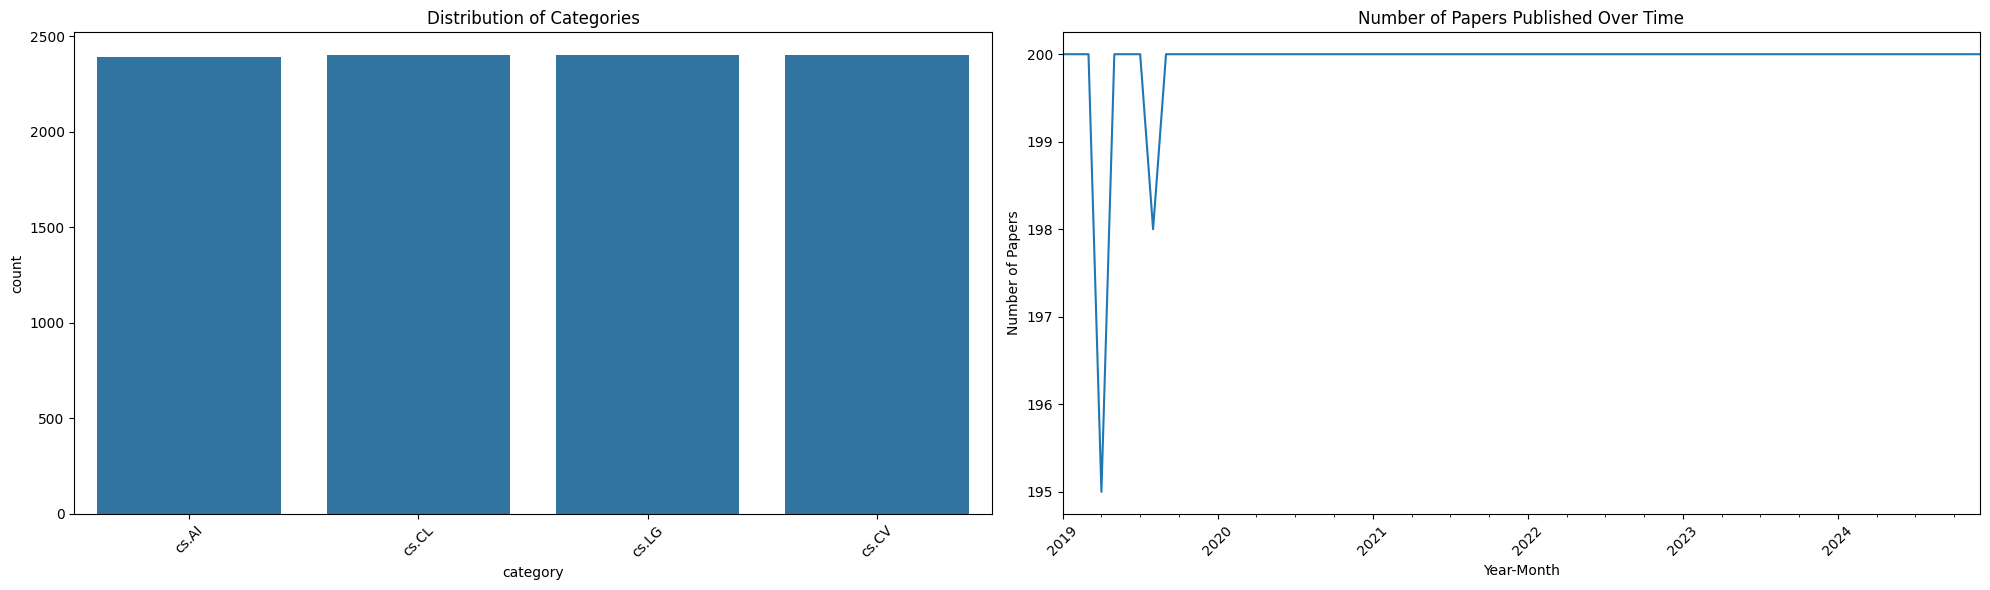

In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Visualize the distribution of categories
sns.countplot(data=df, x='category', ax=axes[0])  # Plot on the first subplot
axes[0].set_title('Distribution of Categories')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Visualize time-based trends (assuming 'published' is in datetime format)
try:
    df['published'] = pd.to_datetime(df['published'], format='%d-%m-%Y')
    df['year_month'] = df['published'].dt.to_period('M')  # Extract year and month
    time_trend = df['year_month'].value_counts().sort_index()

    time_trend.plot(kind='line', ax=axes[1])  # Plot on the second subplot
    axes[1].set_title('Number of Papers Published Over Time')
    axes[1].set_xlabel('Year-Month')
    axes[1].set_ylabel('Number of Papers')
    axes[1].tick_params(axis='x', rotation=45)

except KeyError:
    print("\n'published' column not found. Skipping time-based trend analysis.")
except ValueError:
    print("\nCould not convert 'published' column to datetime.  Check the date format.")

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [6]:
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to stem and lemmatize text
def stem_and_lemmatize(text):
    words = text.split()
    stemmed = [stemmer.stem(word) for word in words]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    return ' '.join(lemmatized)

with tqdm_joblib(tqdm(desc="Stemming and Lemmatizing", total=len(df), leave=True, position=0)) as progress_bar:
    df['cleaned_abstract'] = Parallel(n_jobs=-1)(
        delayed(stem_and_lemmatize)(text) for text in df['abstract']
    )

c:\Users\arnav\anaconda3\envs\FAI_Project\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Stemming and Lemmatizing:   0%|          | 0/9593 [00:00<?, ?it/s]

  0%|          | 0/9593 [00:00<?, ?it/s]

In [7]:
# 2. Initial Stop Word List
stop_words = stopwords.words('english')
custom_stop_words = ['this', 'our', 'propose', 'show', 'paper', 'study', 'new', 'method', 'also', 'use', 'based', 'result', 'data', 'using']
stop_words.extend(custom_stop_words)

# 3. Text Cleaning (with initial stop words)
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', str(text), re.UNICODE)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])
    return text

with tqdm_joblib(tqdm(desc="Cleaning text", total=len(df), leave=True, position=0)) as progress_bar:
    df['cleaned_abstract'] = Parallel(n_jobs=-1)(
        delayed(clean_text)(text) for text in df['abstract']
    )
# 4. N-gram Extraction (BEFORE TF-IDF and further stop word refinement)
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words=stop_words, max_features=2000) 
# Apply initial stop words here
X = vectorizer.fit_transform(df['cleaned_abstract'])

# 5. Identify and Remove Low TF-IDF Terms (AFTER N-gram extraction)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words,max_features=2000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_abstract'])
terms = tfidf_vectorizer.get_feature_names_out()
low_tfidf_terms = [terms[i] for i in tfidf_matrix.sum(axis=0).argsort()[0, :500].tolist()]
stop_words.extend(*low_tfidf_terms)

with tqdm_joblib(tqdm(desc="Cleaning text (final)", total=len(df), leave=True, position=0)) as progress_bar:
    df['cleaned_abstract'] = Parallel(n_jobs=-1)(
        delayed(clean_text)(text) for text in df['abstract']
    )


Cleaning text:   0%|          | 0/9593 [00:00<?, ?it/s]

  0%|          | 0/9593 [00:00<?, ?it/s]

Cleaning text (final):   0%|          | 0/9593 [00:00<?, ?it/s]

  0%|          | 0/9593 [00:00<?, ?it/s]

In [8]:
df['cleaned_abstract'].head().to_list()

['exact inference marginals probabilistic graphical models pgm known intractable necessitating approximate methods existing variational techniques perform iterative passing loopy graphs slow converge many benchmarks algorithm marginal inference buildinferapproximate ibia paradigm algorithm converts pgm sequence linked clique tree forests slctf bounded clique sizes uses heuristic belief update algorithm marginals special case bayesian networks build step ibia uses topological order variables prior marginals consistent ctfs slctf marginals consistent evidence variables slctf approach belief propagation step noniterative accuracycomplexity tradeoff userdefined clique size bounds results several benchmark sets recent uai competitions either better comparable accuracy existing variational sampling methods smaller runtimes',
 'large texttovideo models trained internetscale demonstrated exceptional capabilities generating highfidelity videos arbitrary textual descriptions however models tasks

In [9]:
# Split the DataFrame into two based on the publication date
from sklearn.preprocessing import Normalizer

df_2020 = df[df['published'] < '2023-01-01']
df_2023 = df[df['published'] >= '2023-01-01']


In [10]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Function to perform clustering
def perform_clustering(df, n_components=700):
    # Re-vectorize (with final stop words)
    vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words=stop_words, max_features=2000)
    X = vectorizer.fit_transform(df['cleaned_abstract'])
    # Embedding (using Truncated SVD for dimensionality reduction)
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    svd_matrix = svd.fit_transform(X)
    svd_matrix = Normalizer().fit_transform(svd_matrix)
    print(f"Explained Variance Retained: {svd.explained_variance_ratio_.sum() * 100:.2f}%")

    return svd_matrix

# Function to perform clustering concurrently
def perform_clustering_concurrently(df_2020, df_2023, n_components=700):
    with ThreadPoolExecutor() as executor:
        future_2020 = executor.submit(perform_clustering, df_2020, n_components)
        future_2023 = executor.submit(perform_clustering, df_2023, n_components)
        
        with tqdm(total=2, desc="Clustering", leave=True, position=0) as pbar:
            svd_matrix_2020 = future_2020.result()
            pbar.update(1)
            svd_matrix_2023 = future_2023.result()
            pbar.update(1)
            
    return svd_matrix_2020, svd_matrix_2023

# Perform clustering concurrently
svd_matrix_2020, svd_matrix_2023 = perform_clustering_concurrently(df_2020, df_2023)


Clustering:  50%|█████     | 1/2 [00:06<00:06,  6.48s/it]

Explained Variance Retained: 84.16%


Clustering: 100%|██████████| 2/2 [00:06<00:00,  3.43s/it]

Explained Variance Retained: 83.85%


Calculating distortions: 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]


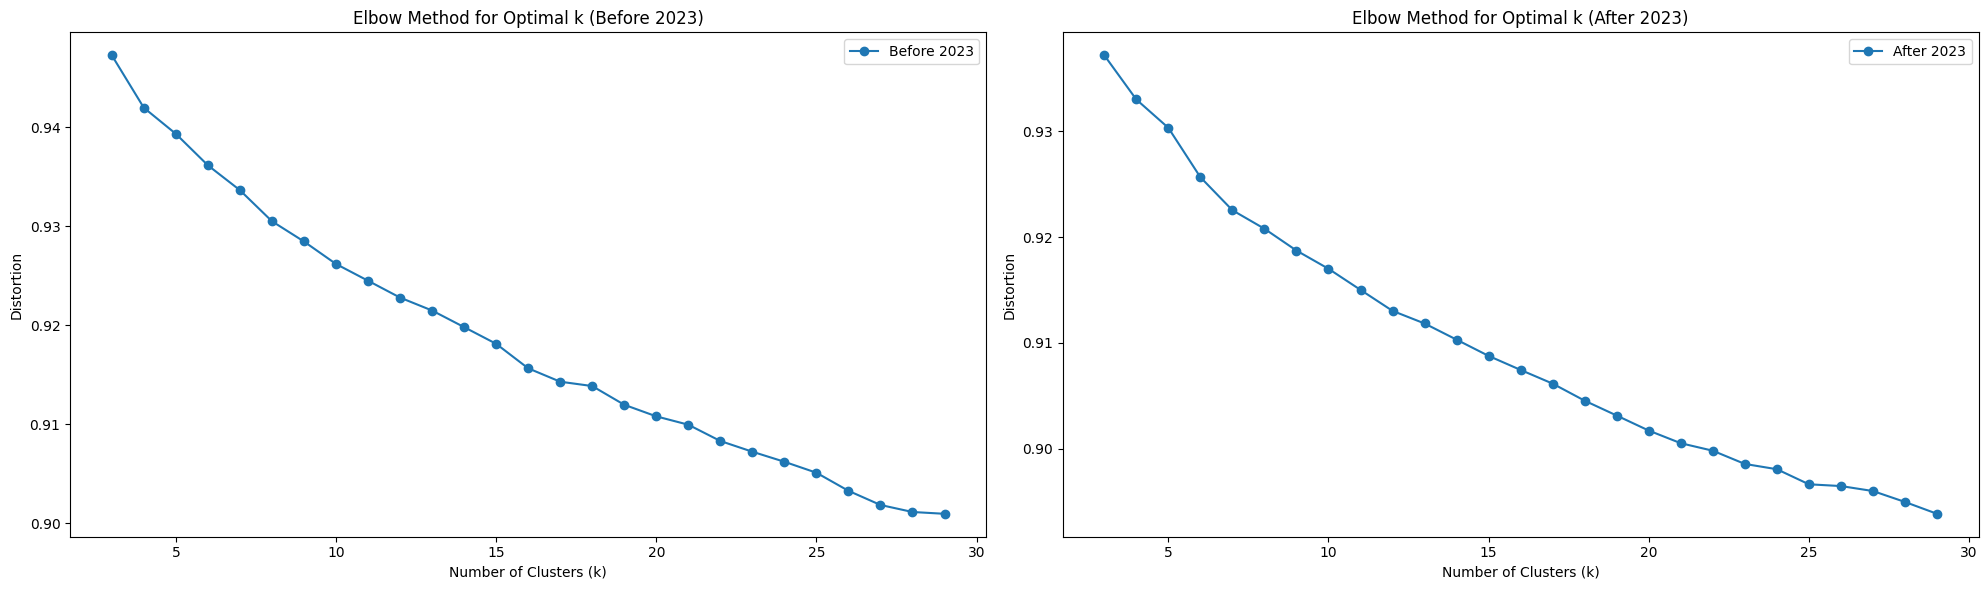

In [11]:
# Experiment with different values of k for KMeans clustering
import numpy as np
from scipy.spatial.distance import cdist

def calculate_distortion(svd_matrix, k_values):
    distortion = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(svd_matrix)
        distortion.append(sum(np.min(cdist(svd_matrix, kmeans.cluster_centers_, 'euclidean'), axis=1)) / svd_matrix.shape[0])
    return distortion

# Experiment with different values of k for KMeans clustering concurrently
k_values = range(3, 30)

with ThreadPoolExecutor() as executor:
    future_2020 = executor.submit(calculate_distortion, svd_matrix_2020, k_values)
    future_2023 = executor.submit(calculate_distortion, svd_matrix_2023, k_values)
    
    with tqdm(total=2, desc="Calculating distortions", leave=True, position=0) as pbar:
        distortion_2020 = future_2020.result()
        pbar.update(1)
        distortion_2023 = future_2023.result()
        pbar.update(1)

# Plot the distortion values to find the optimal k
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for svd_matrix_2020
axes[0].plot(k_values, distortion_2020, marker='o', label='Before 2023')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Distortion')
axes[0].set_title('Elbow Method for Optimal k (Before 2023)')
axes[0].legend()

# Plot for svd_matrix_2023
axes[1].plot(k_values, distortion_2023, marker='o', label='After 2023')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Distortion')
axes[1].set_title('Elbow Method for Optimal k (After 2023)')
axes[1].legend()

plt.tight_layout()
plt.show()


C:\Users\arnav\AppData\Local\Temp\ipykernel_115628\1674415959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cluster'] = kmeans.fit_predict(svd_matrix)


Cluster 0: ['network', 'neural', 'image', 'networks', 'images', 'methods', 'proposed', 'training', 'performance', 'model', 'deep', 'features', 'results', 'detection', 'learning', 'approach', 'datasets', 'novel', 'information', 'object']
Cluster 1: ['language', 'information', 'knowledge', 'systems', 'approach', 'different', 'results', 'task', 'work', 'present', 'model', 'methods', 'human', 'models', 'performance', 'used', 'text', 'proposed', 'dataset', 'tasks']
Cluster 2: ['model', 'models', 'language', 'performance', 'learning', 'training', 'task', 'neural', 'approach', 'proposed', 'results', 'tasks', 'datasets', 'dataset', 'information', 'different', 'methods', 'used', 'text', 'knowledge']
Cluster 3: ['learning', 'deep', 'machine', 'methods', 'reinforcement', 'model', 'tasks', 'approach', 'training', 'performance', 'models', 'results', 'problem', 'framework', 'algorithms', 'learn', 'work', 'proposed', 'knowledge', 'task']
Cluster 4: ['algorithm', 'problem', 'algorithms', 'time', 'prop

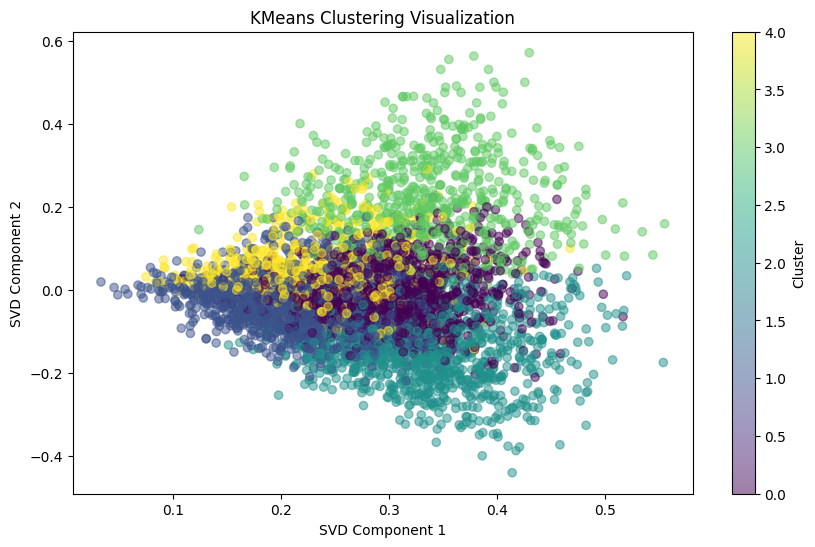

C:\Users\arnav\AppData\Local\Temp\ipykernel_115628\1674415959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cluster'] = kmeans.fit_predict(svd_matrix)


Cluster 0: ['neural', 'graph', 'networks', 'network', 'learning', 'training', 'model', 'performance', 'deep', 'methods', 'models', 'proposed', 'information', 'datasets', 'gnns', 'existing', 'experiments', 'graphs', 'tasks', 'node']
Cluster 1: ['llms', 'models', 'language', 'tasks', 'large', 'llm', 'performance', 'reasoning', 'model', 'knowledge', 'human', 'methods', 'research', 'approach', 'learning', 'text', 'generation', 'framework', 'evaluation', 'capabilities']
Cluster 2: ['models', 'language', 'model', 'learning', 'performance', 'tasks', 'training', 'methods', 'datasets', 'dataset', 'results', 'approach', 'large', 'different', 'text', 'task', 'work', 'experiments', 'human', 'knowledge']
Cluster 3: ['model', 'models', 'learning', 'training', 'performance', 'results', 'methods', 'image', 'proposed', 'tasks', 'task', 'language', 'approach', 'datasets', 'dataset', 'framework', 'novel', 'experiments', 'demonstrate', 'knowledge']
Cluster 4: ['learning', 'methods', 'approach', 'performan

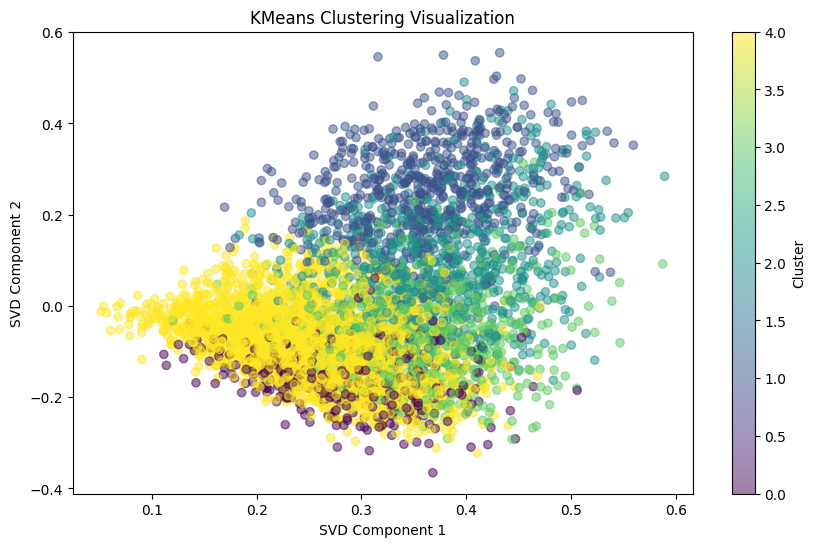

In [12]:
def perform_clustering(df, svd_matrix, n_clusters=5):
    """
    Perform KMeans clustering on the given DataFrame and SVD matrix.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        svd_matrix (np.ndarray): SVD matrix for the data.
        n_clusters (int): Number of clusters for KMeans.

    Returns:
        pd.DataFrame: DataFrame with an additional 'cluster' column.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    df.loc[:, 'cluster'] = kmeans.fit_predict(svd_matrix)

    # Print top terms per cluster
    for cluster_id in range(n_clusters):
        cluster_text = df[df['cluster'] == cluster_id]['cleaned_abstract']
        if cluster_text.empty:
            print(f"Cluster {cluster_id}: [No documents]")
            continue
        tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
        tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_text)
        try:
            top_words_idx = tfidf_matrix.sum(axis=0).argsort()[0, ::-1].tolist()[0]
            top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_words_idx]
        except IndexError:
            top_words = ["No significant terms"]
        print(f"Cluster {cluster_id}: {top_words}")

    # Visualize the KMeans clustering using a scatter plot of the first two SVD components
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(svd_matrix[:, 0], svd_matrix[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.title('KMeans Clustering Visualization')
    plt.show()

    return df

# Perform clustering for both time periods
df_2020 = perform_clustering(df_2020, svd_matrix_2020, n_clusters=5)
df_2023 = perform_clustering(df_2023, svd_matrix_2023, n_clusters=5)

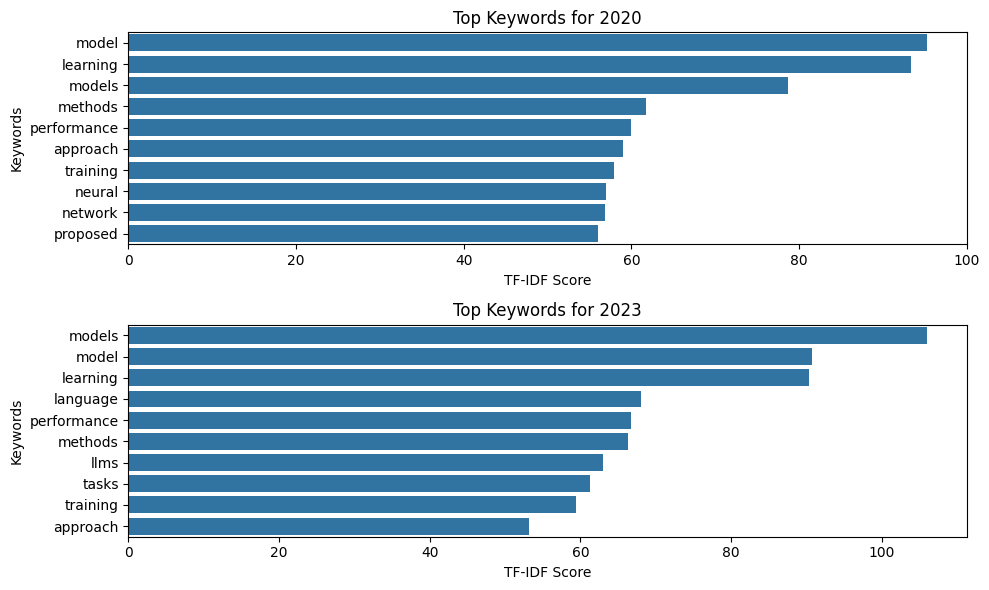

In [13]:
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_keywords_for_df(df, n_terms=10):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95,ngram_range=(1,3), min_df=2, stop_words=stop_words)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_abstract'])
    sum_tfidf = tfidf_matrix.sum(axis=0)
    words_freq = [(word, sum_tfidf[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return sorted_words[:n_terms]

def plot_top_keywords(df_2020, df_2023):
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))

    # Plot for 2020
    top_words_2020 = get_top_keywords_for_df(df_2020)
    words_2020, freqs_2020 = zip(*top_words_2020)
    sns.barplot(x=freqs_2020, y=words_2020, ax=axes[0])
    axes[0].set_title('Top Keywords for 2020')
    axes[0].set_xlabel('TF-IDF Score')
    axes[0].set_ylabel('Keywords')

    # Plot for 2023
    top_words_2023 = get_top_keywords_for_df(df_2023)
    words_2023, freqs_2023 = zip(*top_words_2023)
    sns.barplot(x=freqs_2023, y=words_2023, ax=axes[1])
    axes[1].set_title('Top Keywords for 2023')
    axes[1].set_xlabel('TF-IDF Score')
    axes[1].set_ylabel('Keywords')

    plt.tight_layout()
    plt.show()

# Plot top keywords for each time period
plot_top_keywords(df_2020, df_2023)



Analyzing year: 2020

Analyzing year: 2023



Testing number of topics: 100%|██████████| 1/1 [00:36<00:00, 36.75s/it]

Testing number of topics: 100%|██████████| 1/1 [00:37<00:00, 37.73s/it]


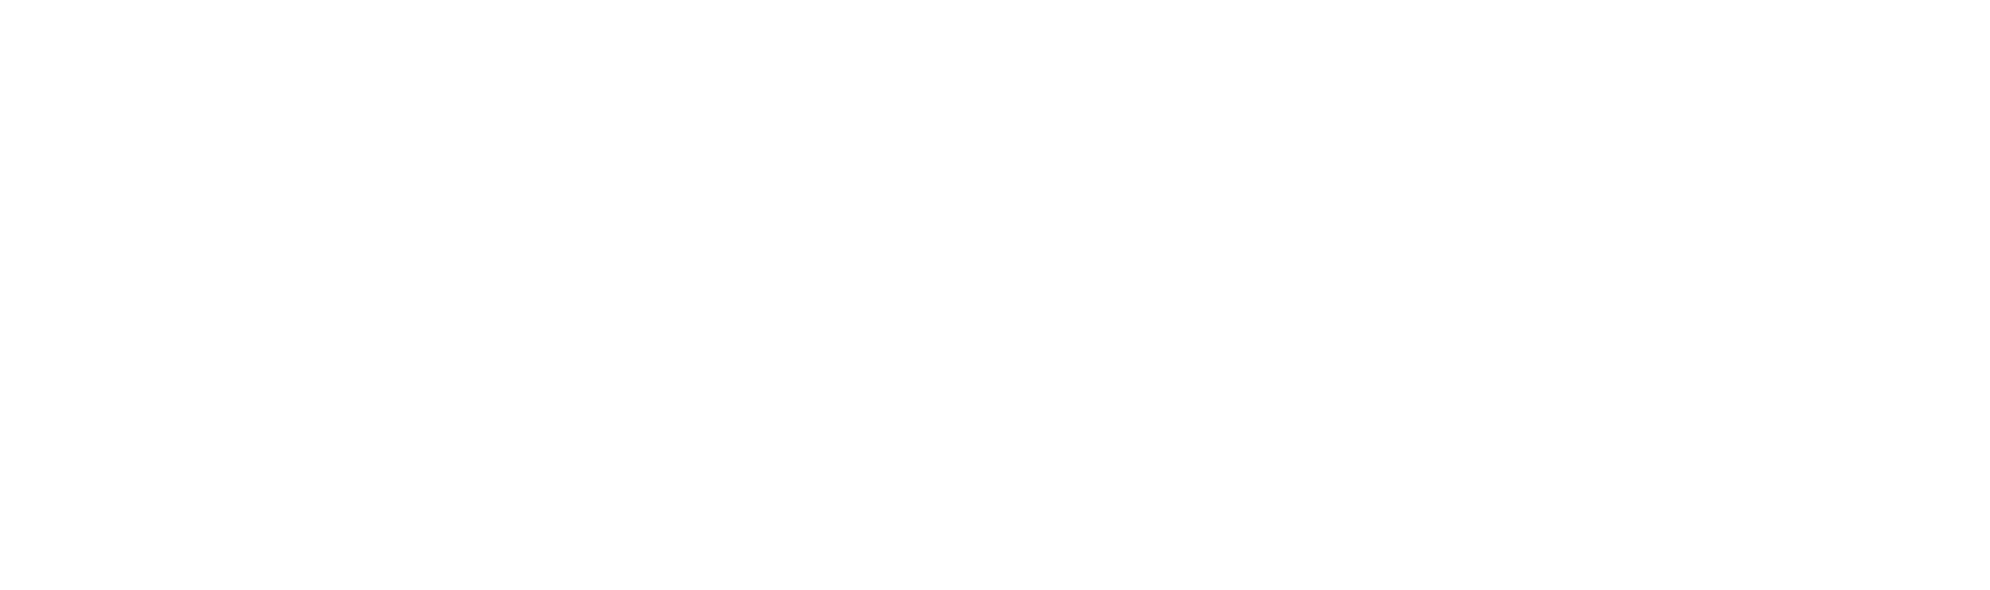

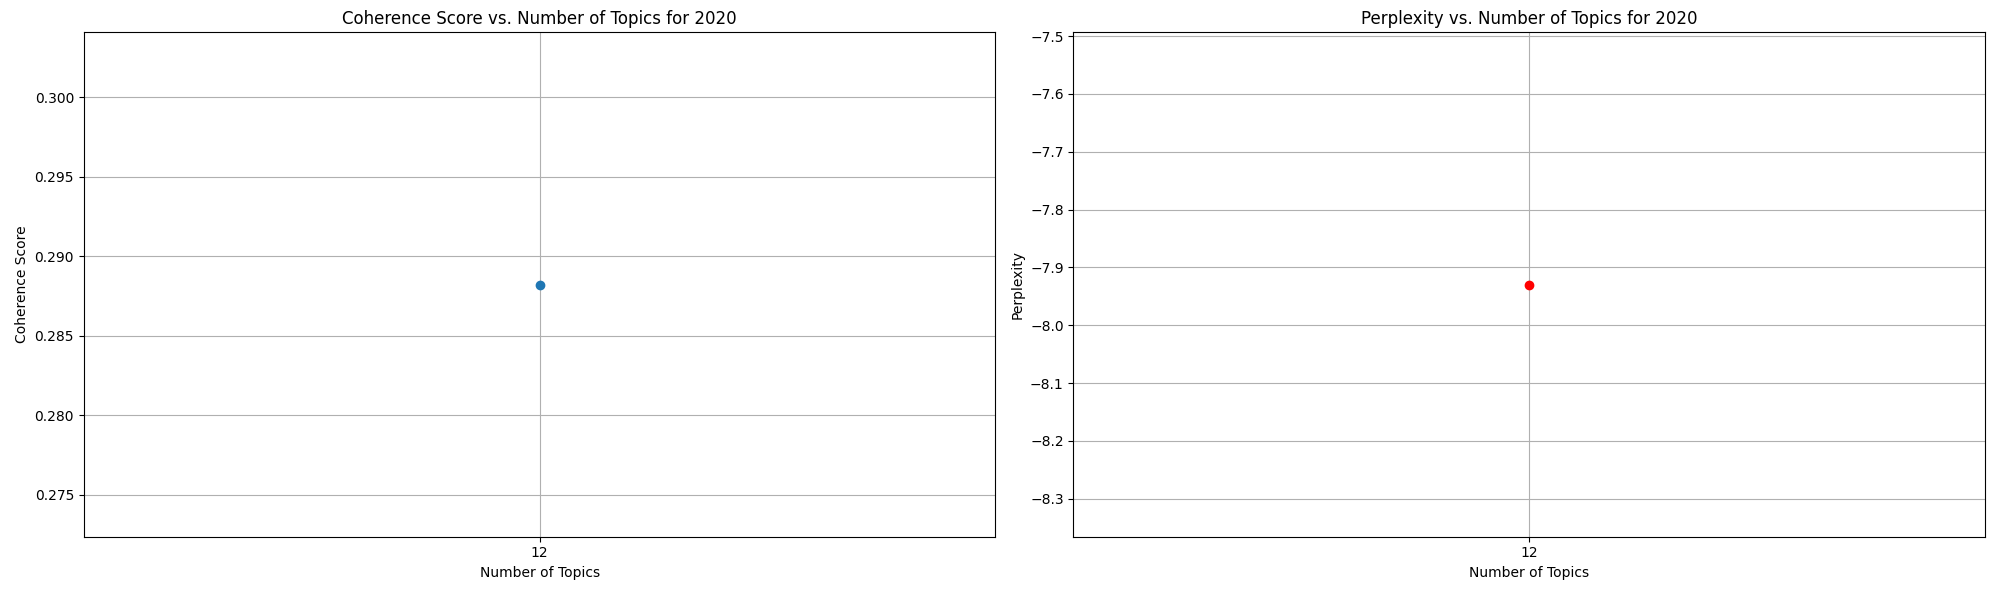

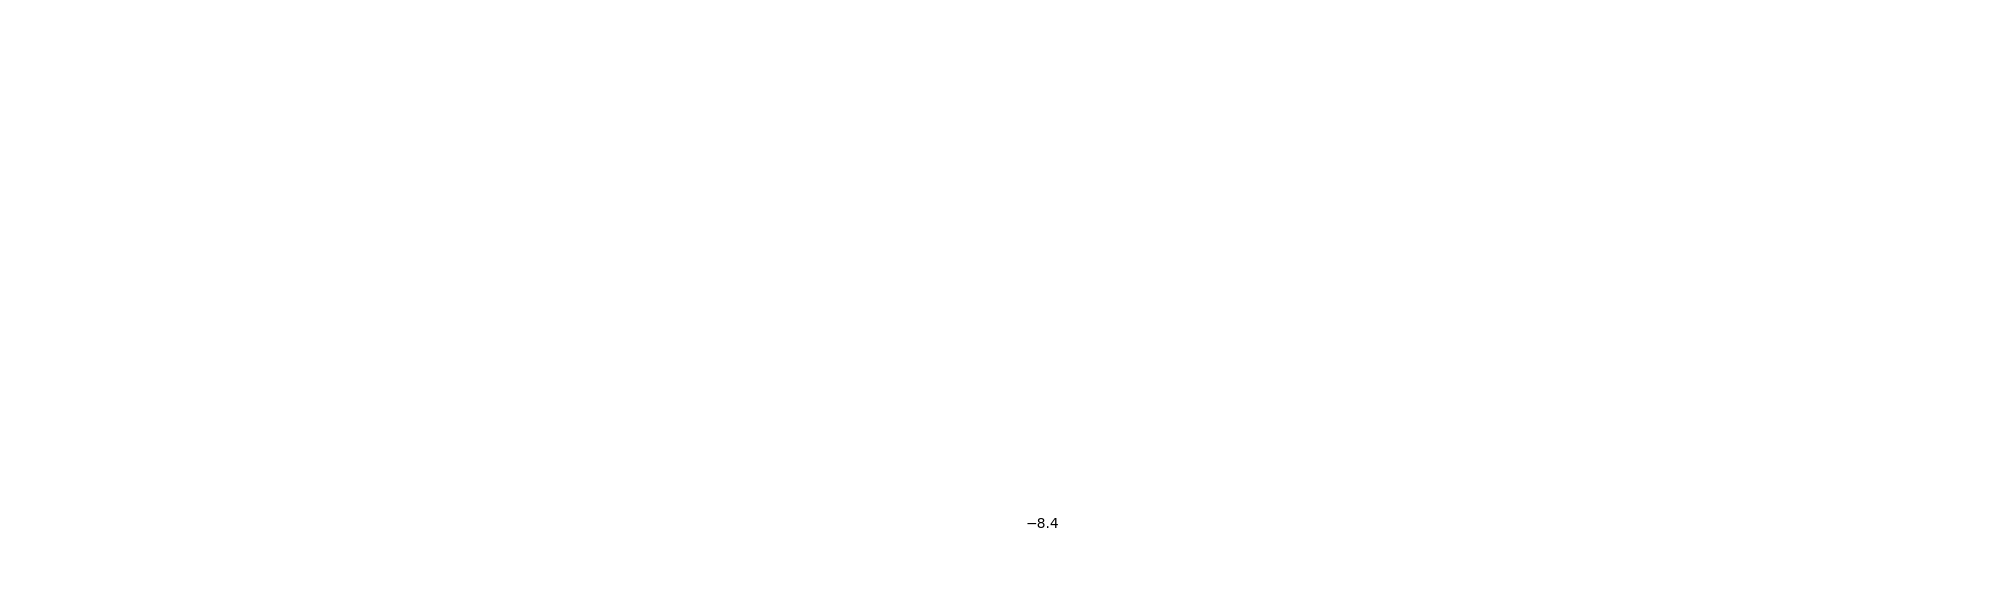


Optimal number of topics for 2020: 12
Coherence Score for 2020 with optimal 12 topics: 0.28822729561602495
Perplexity for 2020 with optimal 12 topics: -7.9296324107095995


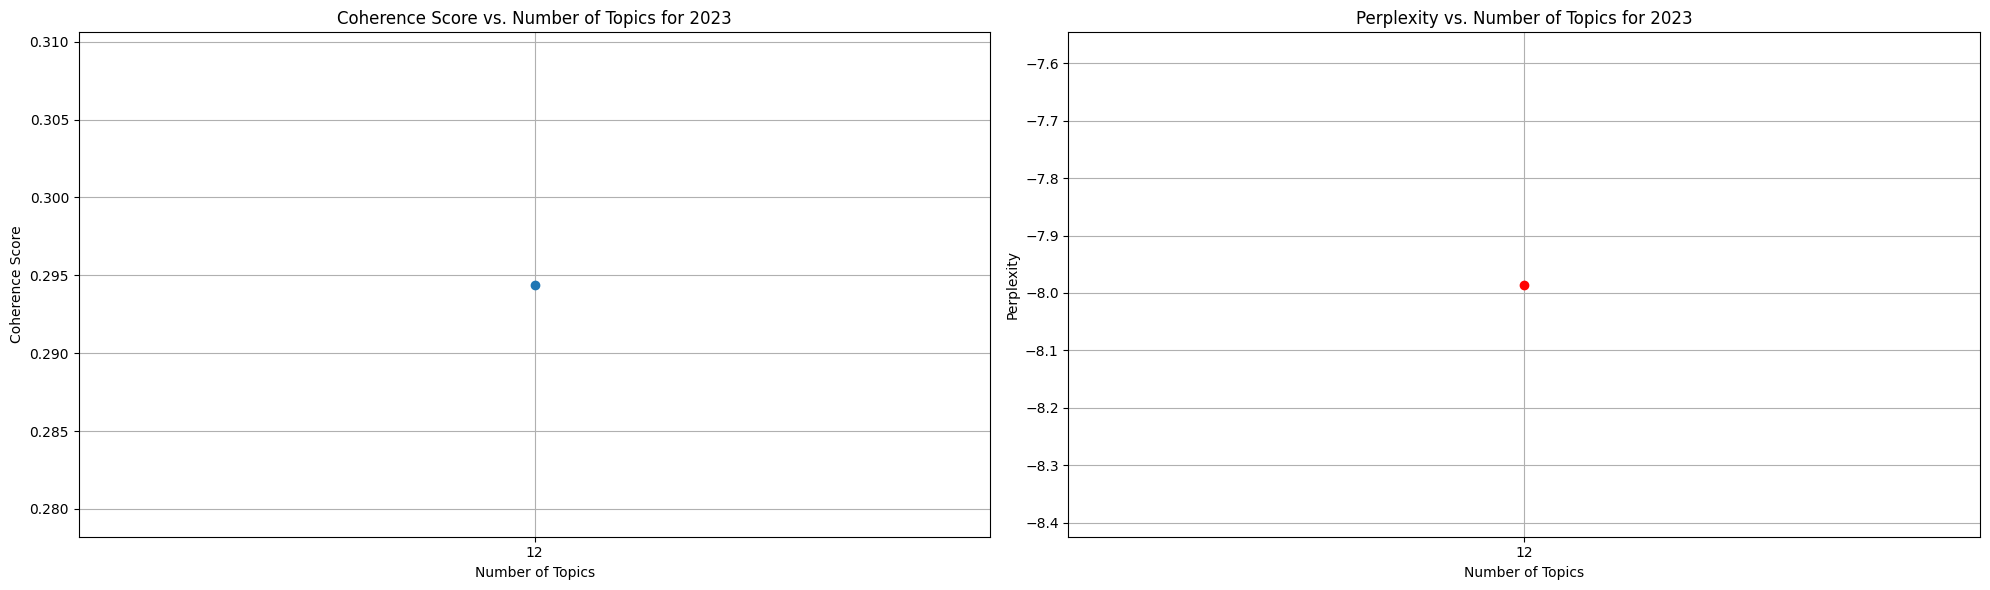


Optimal number of topics for 2023: 12
Coherence Score for 2023 with optimal 12 topics: 0.29440861047299977
Perplexity for 2023 with optimal 12 topics: -7.985326780782293

Comparing topics between 2020 and 2023:

Topic 1 in 2020: ['learning', 'different', 'knowledge', 'information', 'process', 'model', 'methods', 'graph', 'two', 'tasks']
  Compared to Topic 1 in 2023: ['learning', 'models', 'llms', 'model', 'performance', 'methods', 'training', 'however', 'proposed', 'approach']
    Common words: {'learning', 'methods', 'model'}
  Compared to Topic 2 in 2023: ['models', 'performance', 'model', 'tasks', 'task', 'segmentation', 'video', 'methods', 'pretrained', 'training']
    Common words: {'tasks', 'model', 'methods'}
  Compared to Topic 3 in 2023: ['learning', 'models', 'model', 'training', 'information', 'work', 'different', 'methods', 'tasks', 'results']
    Common words: {'learning', 'tasks', 'methods', 'information', 'model', 'different'}
  Compared to Topic 4 in 2023: ['models', 

In [15]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt


def prepare_data(df):
    """
    Prepares the data for LDA by tokenizing, applying n-grams, and removing stop words.

    Args:
        df (pd.DataFrame): DataFrame containing the text data.

    Returns:
        tuple: (list, gensim.corpora.Dictionary, list) - tokenized documents, dictionary, corpus
    """
    documents = [text.split() for text in df['cleaned_abstract']]

    # Create bigrams and trigrams
    bigram = Phrases(documents, min_count=5, threshold=90)
    trigram = Phrases(bigram[documents], threshold=90)
    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)

    # Form bigrams and trigrams
    documents = [bigram_mod[doc] for doc in documents]
    documents = [trigram_mod[bigram_mod[doc]] for doc in documents]

    # Remove stop words
    documents = [[word for word in doc if word not in stop_words] for doc in documents]

    # Create dictionary and corpus
    dictionary = corpora.Dictionary(documents)
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    corpus = [dictionary.doc2bow(doc) for doc in documents]

    return documents, dictionary, corpus

def evaluate_lda(lda_model, corpus, dictionary, documents, coherence_metric='c_v'):
    """
    Evaluates the LDA model using coherence and perplexity.

    Args:
        lda_model (LdaModel): Trained LDA model.
        corpus (list): Corpus of document-term frequencies.
        dictionary (gensim.corpora.Dictionary): Dictionary mapping words to IDs.
        documents (list): List of tokenized documents.
        coherence_metric (str, optional): Coherence metric to use. Defaults to 'c_v'.

    Returns:
        tuple: (float, float) - coherence score, perplexity
    """
    coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence=coherence_metric)
    coherence_lda = coherence_model_lda.get_coherence()
    perplexity = lda_model.log_perplexity(corpus)

    return coherence_lda, perplexity


def perform_lda_and_evaluate(df, period_name, num_topics,testing=False):
    """
    Performs LDA topic modeling, evaluates the model using coherence and perplexity, and prints topics.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        period_name (str): Name of the time period.
        num_topics (int): Number of topics to extract.

    Returns:
        tuple: (LdaModel, gensim.corpora.Dictionary, list, float, float) or (None, None, None, None, None) in case of error.
    """
    try:
        documents, dictionary, corpus = prepare_data(df)
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        coherence_lda, perplexity = evaluate_lda(lda_model, corpus, dictionary, documents)

        if not testing:
            print(f"\nTopics for {period_name} with {num_topics} topics:")
            for topic_id, topic in lda_model.print_topics(num_words=10):
                print(f"Topic {topic_id + 1}: {topic}")

        return lda_model, dictionary, corpus, coherence_lda, perplexity

    except Exception as e:
        print(f"Error performing LDA for {period_name}: {e}")
        return None, None, None, None, None

def test_num_topics(period_df, period_name, num_topics):
    lda_model, dictionary, corpus, coherence_lda, perplexity = perform_lda_and_evaluate(
                period_df, period_name, num_topics, True
            )
    model_num_topics = {'model': lda_model, 'dictionary': dictionary, 'corpus': corpus}
    return coherence_lda, perplexity, model_num_topics
    

def analyze_year(df, year, num_topics_range):
    """
    Analyzes the given DataFrame by performing LDA topic modeling for the entire year,
    iterating through a range of num_topics to find the optimal number of topics based on coherence.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        year (int): Year for the analysis.
        num_topics_range (range): Range of number of topics to extract.
        stop_words (list): List of stop words to remove.

    Returns:
        dict: Dictionary containing LDA models, dictionaries, and corpora for the year.
    """
    period_df = df[df['published'].dt.year == year]
    period_name = str(year)

    print(f"\nAnalyzing year: {period_name}")
    coherence_scores, perplexity_scores, models = {}, {}, {}
    if len(period_df) > 0:
        with ThreadPoolExecutor() as executor:
            futures = {executor.submit(test_num_topics, period_df, period_name, num_topics): num_topics for num_topics in num_topics_range}
            for future in tqdm(futures, desc="Testing number of topics", total=len(futures)):
                num_topics = futures[future]
                try:
                    coherence, perplexity, model = future.result()
                    coherence_scores[num_topics] = coherence if coherence else None
                    perplexity_scores[num_topics] = perplexity if perplexity else None
                    models[num_topics] = model if model else None
                except Exception as e:
                    print(f"Error with {num_topics} topics: {e}")

        coherence_scores = [coherence_scores[i] for i in num_topics_range]
        perplexity_scores = [perplexity_scores[i] for i in num_topics_range]
        
        # Plotting coherence and perplexity scores
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))

        # Plot coherence scores
        axes[0].plot(list(num_topics_range), coherence_scores, marker='o')
        axes[0].set_xlabel("Number of Topics")
        axes[0].set_ylabel("Coherence Score")
        axes[0].set_title(f"Coherence Score vs. Number of Topics for {period_name}")
        axes[0].set_xticks(list(num_topics_range))
        axes[0].grid(True)

        # Plot perplexity scores
        axes[1].plot(list(num_topics_range), perplexity_scores, marker='o', color='r')
        axes[1].set_xlabel("Number of Topics")
        axes[1].set_ylabel("Perplexity")
        axes[1].set_title(f"Perplexity vs. Number of Topics for {period_name}")
        axes[1].set_xticks(list(num_topics_range))
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

        # Determine optimal number of topics (e.g., based on highest coherence)
        valid_scores = [score for score in coherence_scores if score is not None]
        if not valid_scores:
            print("No valid LDA models were trained.")
            return None

        optimal_num_topics = list(num_topics_range)[coherence_scores.index(max(valid_scores))]
        print(f"\nOptimal number of topics for {period_name}: {optimal_num_topics}")
        
        optimal_num_topics = list(num_topics_range)[coherence_scores.index(max(valid_scores))]
        print(f'Coherence Score for {period_name} with optimal {optimal_num_topics} topics: {coherence_scores[num_topics_range.index(optimal_num_topics)]}')
        print(f'Perplexity for {period_name} with optimal {optimal_num_topics} topics: {perplexity_scores[num_topics_range.index(optimal_num_topics)]}')

        return {'year': period_name, 'topics': models[optimal_num_topics], 'num_topics': optimal_num_topics}  # Return a dict
    
    else:
        print("No data for this year.")
        return None

def compare_topics(topics_data, period1, period2):
    """
    Compares topics between two time periods based on word overlap.

    Args:
        topics_data (dict): Dictionary containing LDA models, dictionaries, and corpora for each time period.
        period1 (str): Name of the first time period.
        period2 (str): Name of the second time period.
    """
    print(f"\nComparing topics between {period1} and {period2}:")

    if period1 not in topics_data or period2 not in topics_data:
        print("One or both periods not found.")
        return

    lda_model1 = topics_data[period1]['topics']['model']
    lda_model2 = topics_data[period2]['topics']['model']

    for topic_id1 in range(lda_model1.num_topics):
        topic1_words = [word for word, prob in lda_model1.show_topic(topic_id1, topn=10)]
        print(f"\nTopic {topic_id1 + 1} in {period1}: {topic1_words}")

        for topic_id2 in range(lda_model2.num_topics):
            topic2_words = [word for word, prob in lda_model2.show_topic(topic_id2, topn=10)]
            common_words = set(topic1_words) & set(topic2_words)
            print(f"  Compared to Topic {topic_id2 + 1} in {period2}: {topic2_words}")
            print(f"    Common words: {common_words}")


# Define the range of topics to explore
num_topics_range = range(12, 13)  # e.g., from 3 to 15 topics

# Analyze years 2020 and 2023 in parallel
with ThreadPoolExecutor() as executor:
    future_2020 = executor.submit(analyze_year, df_2020, 2020, num_topics_range)
    future_2023 = executor.submit(analyze_year, df_2023, 2023, num_topics_range)

    topics_2020 = future_2020.result()
    topics_2023 = future_2023.result()

# Prepare data for comparison
topics_data = {}
if topics_2020:
    topics_data['2020'] = topics_2020
if topics_2023:
    topics_data['2023'] = topics_2023

# Example usage of compare_topics (compare topics of 2020 and 2023)
if topics_2020 and topics_2023:
    compare_topics(topics_data, '2020', '2023')


In [16]:
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis

# Prepare the pyLDAvis visualization for 2020
lda_display_2020 = gensimvis.prepare(topics_2020['topics']['model'], topics_2020['topics']['corpus'], topics_2020['topics']['dictionary'])
pyLDAvis.display(lda_display_2020)

In [17]:
# Prepare the pyLDAvis visualization for 2023
lda_display_2023 = gensimvis.prepare(topics_2023['topics']['model'], topics_2023['topics']['corpus'], topics_2023['topics']['dictionary'])
pyLDAvis.display(lda_display_2023)
